### This file covers the topics of

📥 Data loading and preprocessing

📊 Exploratory Data Analysis (EDA)

🧠 Semi-supervised learning intro

🧪 Training a model using Label Propagation and Label Spreading

🕵️‍♂️ Comparing performance with and without labelled data

📈 Visualizations

📤 Exporting predictions

📊 Simple interactive dashboard using ipywidgets + plotly

# 🌱 Semi-Supervised Learning Introduction

This notebook introduces the concept of **Semi-Supervised Learning**, a powerful technique used when we have **a small amount of labelled data** and a **large amount of unlabelled data**.

We will use the `iris.csv` dataset to simulate a real-world scenario where only a few data points are labeled and the rest need to be inferred.

## 📚 Topics Covered
- Data loading and preprocessing
- Exploratory Data Analysis (EDA)
- Semi-supervised model training (Label Propagation & Spreading)
- Performance Evaluation
- Interactive Dashboard


### ✅ 2️⃣ Code: Data Loading & Preprocessing

In [8]:
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
df = pd.read_csv(r'C:/Users/yadav/Documents/Projects/ML-Algorithms-Tutorial/datasets/classification/iris.csv', header=None)
# Assign column names
df.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# Display the first few rows to verify
df.head()
# Encode target labels
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

# Separate features and target
X = df.drop('species', axis=1)
y = df['species']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Simulate semi-supervised: only label 10% of data
rng = np.random.RandomState(42)
y_semi = y.copy()
mask = rng.rand(len(y)) < 0.9
y_semi[mask] = -1  # Unlabeled

print("Total samples:", len(y))
print("Labeled samples:", (y_semi != -1).sum())
print("Unlabeled samples:", (y_semi == -1).sum())


Total samples: 150
Labeled samples: 14
Unlabeled samples: 136


### EDA Visualization

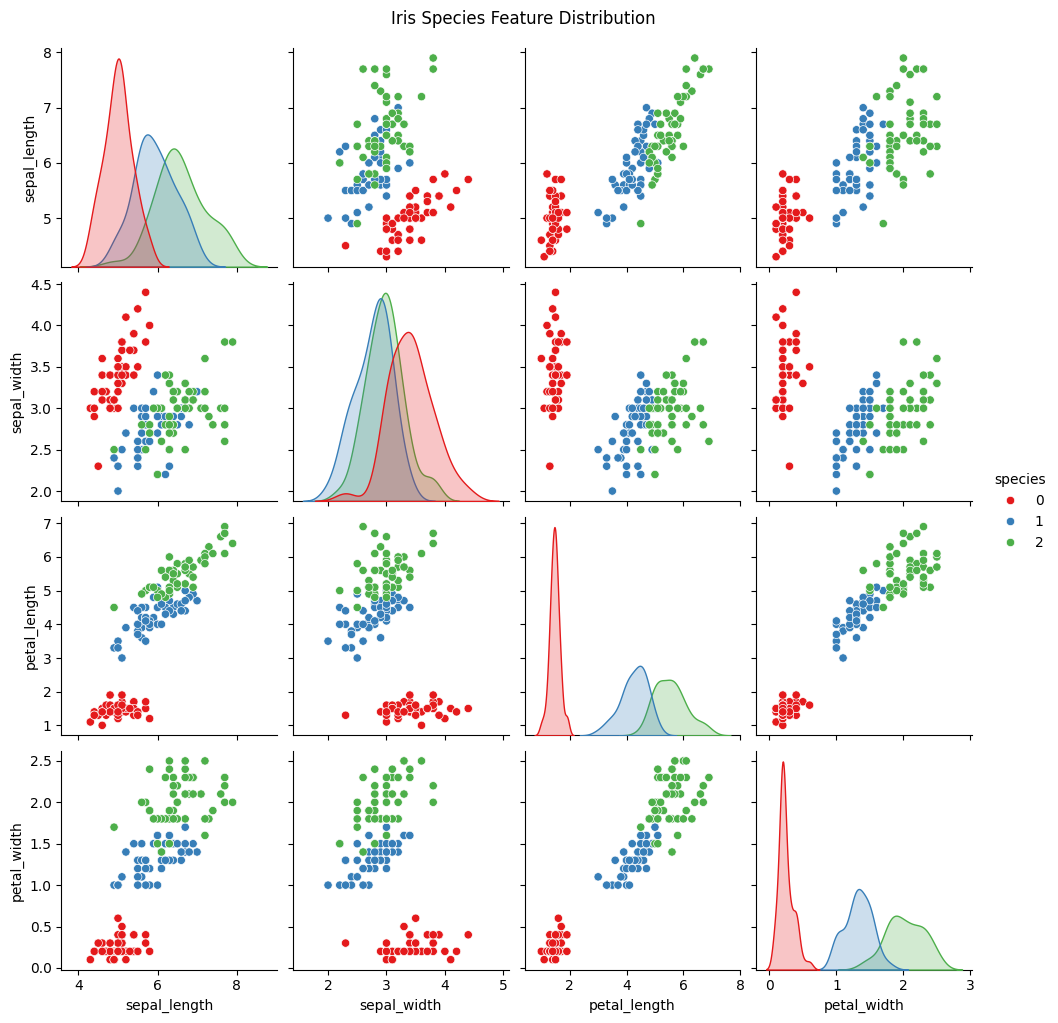

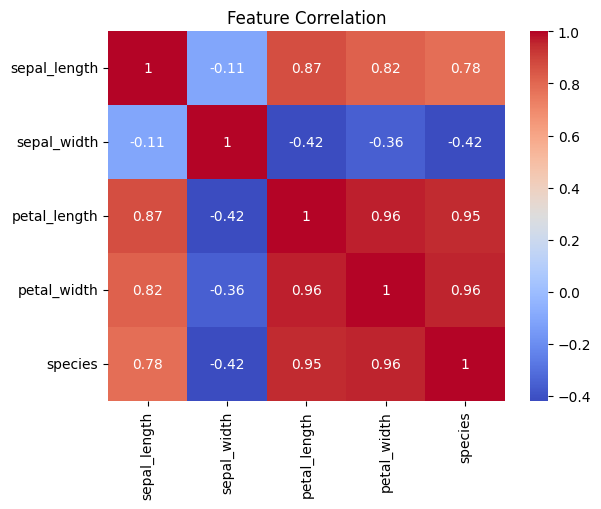

In [9]:
sns.pairplot(df, hue='species', palette='Set1')
plt.suptitle("Iris Species Feature Distribution", y=1.02)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

## 🧠 Training Semi-Supervised Models

We'll use two common algorithms for semi-supervised learning:
- **Label Propagation**
- **Label Spreading**

These methods work by propagating labels from the small labeled set to the larger unlabelled set using graph-based techniques.


In [10]:
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.metrics import classification_report, accuracy_score

# True labels for evaluation
true_y = y

# Label Propagation
lp_model = LabelPropagation()
lp_model.fit(X_scaled, y_semi)
lp_preds = lp_model.predict(X_scaled)

# Label Spreading
ls_model = LabelSpreading()
ls_model.fit(X_scaled, y_semi)
ls_preds = ls_model.predict(X_scaled)

# Evaluation
print("=== Label Propagation ===")
print(classification_report(true_y, lp_preds))

print("=== Label Spreading ===")
print(classification_report(true_y, ls_preds))


=== Label Propagation ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.85      0.92      0.88        50
           2       0.91      0.84      0.88        50

    accuracy                           0.92       150
   macro avg       0.92      0.92      0.92       150
weighted avg       0.92      0.92      0.92       150

=== Label Spreading ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.90      0.93        50
           2       0.91      0.96      0.93        50

    accuracy                           0.95       150
   macro avg       0.95      0.95      0.95       150
weighted avg       0.95      0.95      0.95       150



c:\Users\yadav\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\semi_supervised\_label_propagation.py:324: ConvergenceWarning: max_iter=1000 was reached without convergence.
  warnings.warn(


## 📈 Visualizing Predicted Labels
We will reduce the feature space using PCA for visualisation of the predicted labels.


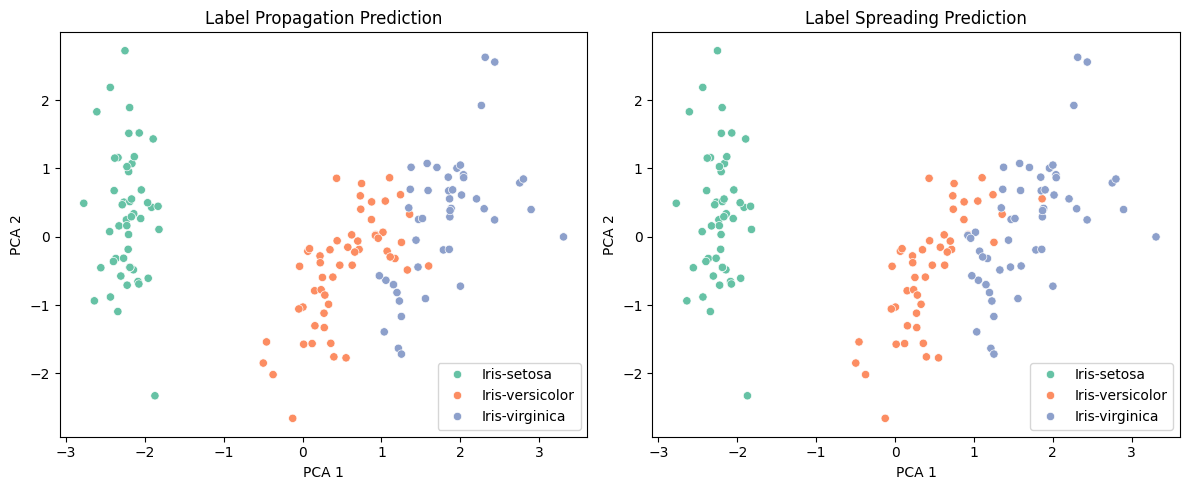

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for ax, preds, title in zip(axes, [lp_preds, ls_preds], ['Label Propagation', 'Label Spreading']):
    sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=label_encoder.inverse_transform(preds),
                    palette='Set2', ax=ax)
    ax.set_title(f'{title} Prediction')
    ax.set_xlabel("PCA 1")
    ax.set_ylabel("PCA 2")

plt.tight_layout()
plt.show()


## 📤 Exporting Predicted Labels
You can export the model predictions as a CSV file for future analysis.


In [12]:
df['LP_Prediction'] = lp_preds
df['LS_Prediction'] = ls_preds

df.to_csv("iris_with_semi_supervised_preds.csv", index=False)
print("📁 Exported: iris_with_semi_supervised_preds.csv")


📁 Exported: iris_with_semi_supervised_preds.csv


### Interactive Dashboard

In [13]:
import ipywidgets as widgets
import plotly.express as px
from IPython.display import display

# Widget to select model
model_widget = widgets.Dropdown(
    options=['Label Propagation', 'Label Spreading'],
    value='Label Propagation',
    description='Model:'
)

def interactive_plot(model_choice):
    preds = lp_preds if model_choice == 'Label Propagation' else ls_preds
    df_plot = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
    df_plot['Predicted'] = label_encoder.inverse_transform(preds)
    fig = px.scatter(df_plot, x='PCA1', y='PCA2', color='Predicted',
                     title=f"{model_choice} Predictions (PCA View)")
    fig.show()

widgets.interact(interactive_plot, model_choice=model_widget)


interactive(children=(Dropdown(description='Model:', options=('Label Propagation', 'Label Spreading'), value='…

<function __main__.interactive_plot(model_choice)>